In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nickr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Exploration

- distribution label
- histogram text length
- top n words by label
- distribution of labels per author
- Correlation of author + label
- clustering ? e.g. labels and authors

In [4]:
claims = pd.read_csv("../../../data/preprocessed_claims_new.csv", sep=",", index_col=0)

## Some general statistics

In [6]:
claims.columns

Index(['ID', 'claim', 'date', 'truth_rating', 'n_token'], dtype='object')

In [34]:
years = claims.date.apply(lambda x: x.split("-")[0]).values

In [35]:
years.sort()

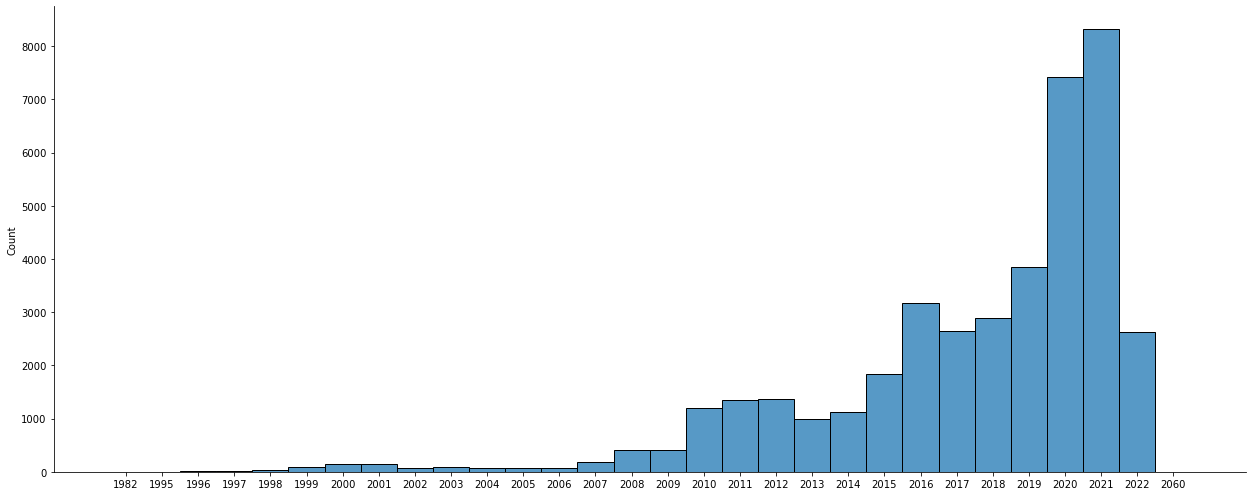

In [38]:
sns.displot(years, height=7, aspect=2.5);

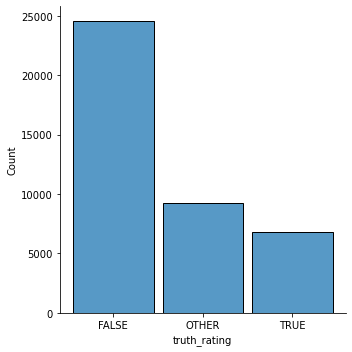

In [22]:
sns.displot(claims, x="truth_rating", shrink=.9);

## Distribution of labels by truth value

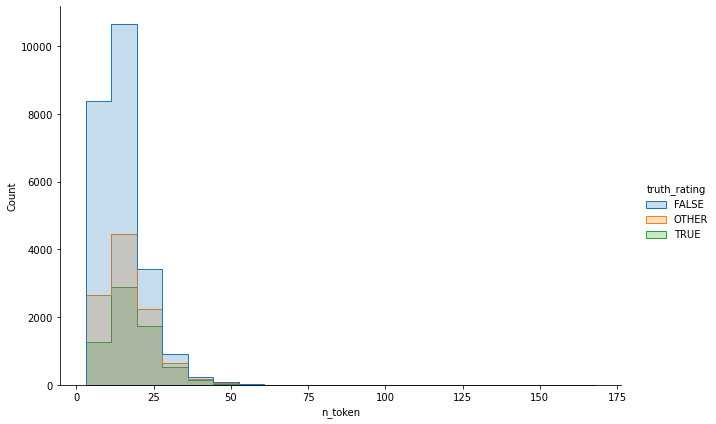

In [42]:
sns.displot(claims, x="n_token", hue="truth_rating", bins=20, element="step", height=6, aspect=1.5);

## Truth rating distribution per Author

In [43]:
grouping = claims.groupby("claim_author")["truth_rating"]

In [66]:
top_authors = grouping.count().sort_values(ascending=False)[:10]
top_authors

claim_author
Dan Evon               3175
Kim LaCapria           2518
Multiple sources       2274
David Mikkelson        1986
Louis Jacobson         1212
Ciara O'Rourke         1171
Bethania Palma         1042
Elias Atienza           881
Trevor Schakohl         871
Rich Buhler & Staff     827
Name: truth_rating, dtype: int64

In [69]:
truth_rating_distributions = grouping.value_counts().sort_values(ascending=False)[top_authors.index]
truth_rating_distributions

claim_author         truth_rating
Dan Evon             FALSE           2448
                     TRUE             484
                     OTHER            243
Kim LaCapria         OTHER           1231
                     FALSE            679
                     TRUE             608
Multiple sources     FALSE           2183
                     OTHER             91
David Mikkelson      FALSE           1319
                     TRUE             394
                     OTHER            273
Louis Jacobson       FALSE            633
                     OTHER            426
                     TRUE             153
Ciara O'Rourke       FALSE           1089
                     OTHER             47
                     TRUE              35
Bethania Palma       FALSE            486
                     TRUE             365
                     OTHER            191
Elias Atienza        FALSE            880
                     OTHER              1
Trevor Schakohl      FALSE            871


## Top 15 words by label

In [61]:
def clean_and_tokenize(claim, stopwords = None):
            
    claim = word_tokenize(claim)
        
    if stopwords:
        filtered_claim = []
        for w in claim:
            if w.lower() not in stopwords:
                filtered_claim.append(w.lower())
        return filtered_claim
    else:
        return claim 

In [59]:
STOPWORDS = nltk.corpus.stopwords.words("english")

In [50]:
labels = ["FALSE", "OTHER", "TRUE"]
profiles = {}
for label in labels:
    subsample = claims[claims.truth_rating == label].claim
    profile = pd.Series(np.hstack([clean_and_tokenize(claim) for claim in subsample])).value_counts().index
    # save to profiles
    profiles[label] = profile

## Top 15 words per profile (raw)

In [57]:

pd.DataFrame({"FALSE" : profiles["FALSE"][:15],
              "OTHER" : profiles["OTHER"][:15],
              "TRUE" : profiles["TRUE"][:15]})

,FALSE,OTHER,TRUE
0,.,.,.
1,the,the,the
2,',','
3,a,of,","
4,in,in,a
5,of,",",of
6,",",to,in
7,to,a,to
8,’,and,and
9,and,is,for


In [62]:
labels = ["FALSE", "OTHER", "TRUE"]
profiles = {}
for label in labels:
    subsample = claims[claims.truth_rating == label].claim
    profile = pd.Series(np.hstack([clean_and_tokenize(claim, STOPWORDS) for claim in subsample])).value_counts().index
    # save to profiles
    profiles[label] = profile

## Top 15 words per profile (with removed stopwors)

In [63]:
pd.DataFrame({"FALSE" : profiles["FALSE"][:15],
              "OTHER" : profiles["OTHER"][:15],
              "TRUE" : profiles["TRUE"][:15]})

,FALSE,OTHER,TRUE
0,.,.,.
1,',','
2,",",",",","
3,’,’,’
4,?,says,'s
5,shows,'s,president
6,”,$,u.s.
7,“,people,trump
8,says,president,says
9,trump,”,shows
